In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/install-future-program-ankara-hackathon/sample_submission.csv
/kaggle/input/install-future-program-ankara-hackathon/train.csv
/kaggle/input/install-future-program-ankara-hackathon/test.csv


In [165]:
data = pd.read_csv("/kaggle/input/install-future-program-ankara-hackathon/train.csv")
test_data=pd.read_csv("/kaggle/input/install-future-program-ankara-hackathon/test.csv")


In [166]:
data.head()

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28


In [167]:
data.tail()

,DATETIME,SERVER,CPU,CPULOAD
312691,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17
312692,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02
312693,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14
312694,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42
312695,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-9,13.30


In [168]:
test_data.head()

,index,DATETIME,SERVER,CPU
0,0,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-0
1,1,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-1
2,2,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-10
3,3,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-11
4,4,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-12


In [169]:
test_data.tail()

,index,DATETIME,SERVER,CPU
4603,4603,2020-05-31 23:45:00+03:00,CIHAZ_305,CPU-5
4604,4604,2020-05-31 23:45:00+03:00,CIHAZ_305,CPU-6
4605,4605,2020-05-31 23:45:00+03:00,CIHAZ_305,CPU-7
4606,4606,2020-05-31 23:45:00+03:00,CIHAZ_305,CPU-8
4607,4607,2020-05-31 23:45:00+03:00,CIHAZ_305,CPU-9


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312696 entries, 0 to 312695
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DATETIME  312696 non-null  object 
 1   SERVER    312696 non-null  object 
 2   CPU       312696 non-null  object 
 3   CPULOAD   312696 non-null  float64
dtypes: float64(1), object(3)
memory usage: 9.5+ MB


In [171]:
data.describe()

,CPULOAD
count,312696.000000
mean,10.283954
std,9.904820
min,0.060000
25%,2.050000
50%,6.820000
75%,16.040000
max,68.840000


In [172]:
data.corr(numeric_only=True)

,CPULOAD
CPULOAD,1.0


In [173]:
import matplotlib.pyplot as plt

In [174]:
data.dtypes

DATETIME     object
SERVER       object
CPU          object
CPULOAD     float64
dtype: object

In [175]:
data.columns

Index(['DATETIME', 'SERVER', 'CPU', 'CPULOAD'], dtype='object')

In [176]:
test_data.head()

,index,DATETIME,SERVER,CPU
0,0,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-0
1,1,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-1
2,2,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-10
3,3,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-11
4,4,2020-05-31 00:00:00+03:00,CIHAZ_301,CPU-12


In [177]:
data.dtypes

DATETIME     object
SERVER       object
CPU          object
CPULOAD     float64
dtype: object

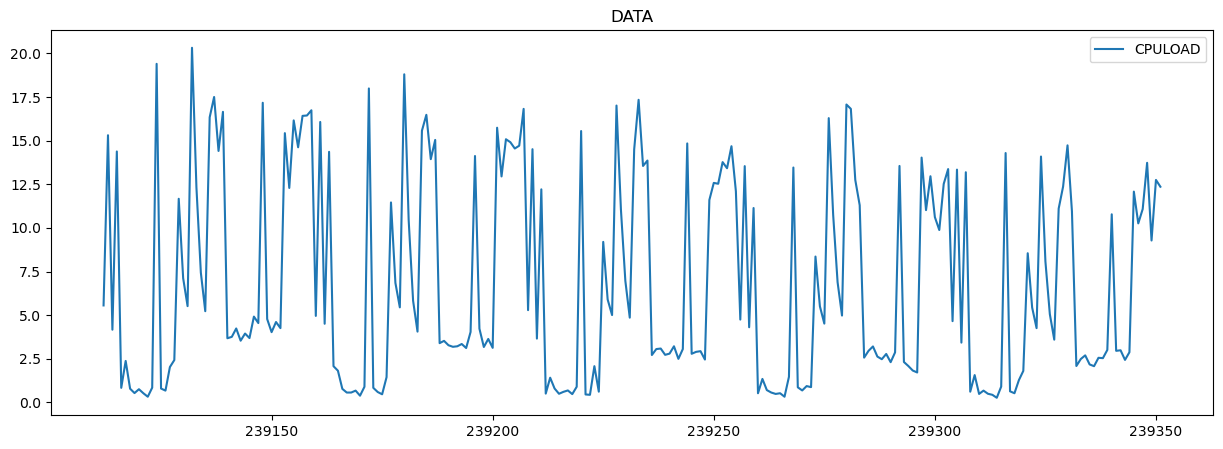

In [179]:
data.loc[(data['DATETIME'] > '2020-05-15 00:00:00') & (data['DATETIME'] < '2020-05-15 01:00:10')] \
    .plot(figsize=(15, 5), title='DATA')
plt.show()

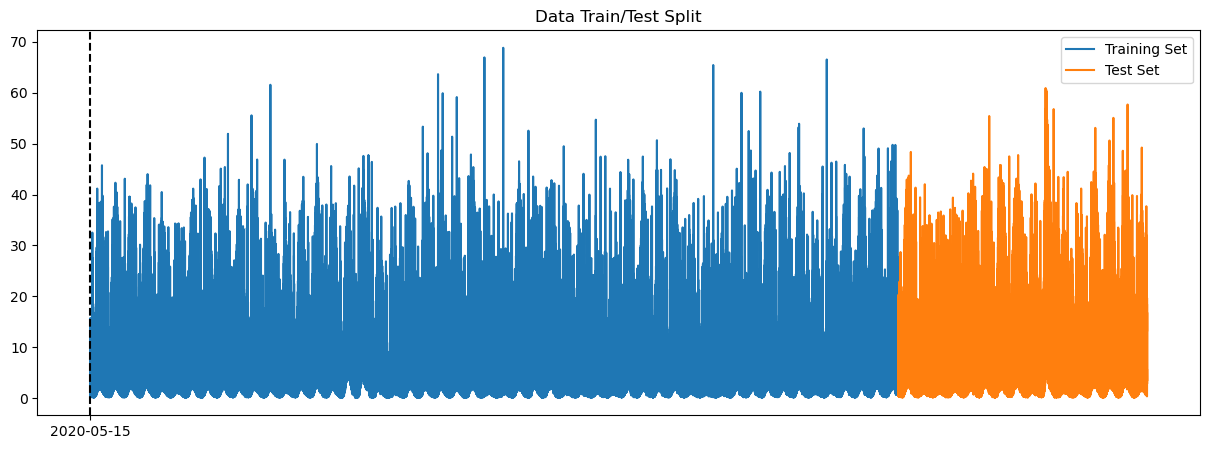

In [180]:
train = data.loc[data['DATETIME'] < '2020-05-15']
test = data.loc[data['DATETIME'] >= '2020-05-15']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-05-15', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [181]:
data['DATETIME'] = pd.to_datetime(data['DATETIME'])

data['DATETIME'] = data['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [182]:
test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'])
test_data['DATETIME'] = test_data['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [193]:
import pandas as pd
from prophet import Prophet


predictions_df = pd.DataFrame()

for server in data['SERVER'].unique():
    for cpu in data[data['SERVER'] == server]['CPU'].unique():

        temp_df = data[(data['SERVER'] == server) & (data['CPU'] == cpu)].copy()
        temp_df = temp_df[['DATETIME', 'CPULOAD']] 
        temp_df.columns = ['ds', 'y']  

        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
        model.fit(temp_df)

        future = test_data[test_data['SERVER'] == server][['DATETIME']].copy()
        future.columns = ['ds']
        forecast = model.predict(future)

       
        forecast['SERVER'] = server  
        forecast['CPU'] = cpu
        predictions_df = pd.concat([predictions_df, forecast], ignore_index=True)

11:52:47 - cmdstanpy - INFO - Chain [1] start processing
11:52:50 - cmdstanpy - INFO - Chain [1] done processing
11:52:52 - cmdstanpy - INFO - Chain [1] start processing
11:52:53 - cmdstanpy - INFO - Chain [1] done processing
11:52:55 - cmdstanpy - INFO - Chain [1] start processing
11:52:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] start processing
11:53:03 - cmdstanpy - INFO - Chain [1] done processing
11:53:05 - cmdstanpy - INFO - Chain [1] start processing
11:53:08 - cmdstanpy - INFO - Chain [1] done processing
11:53:10 - cmdstanpy - INFO - Chain [1] start processing
11:53:14 - cmdstanpy - INFO - Chain [1] done processing
11:53:16 - cmdstanpy - INFO - Chain [1] start processing
11:53:20 - cmdstanpy - INFO - Chain [1] done processing
11:53:22 - cmdstanpy - INFO - Chain [1] start processing
11:53:25 - cmdstanpy - INFO - Chain [1] done processing
11:53:27 - cmdstanpy - INFO - Chain [1] start processing
11:53:31 - cmdstanpy - INFO - Chain [1]

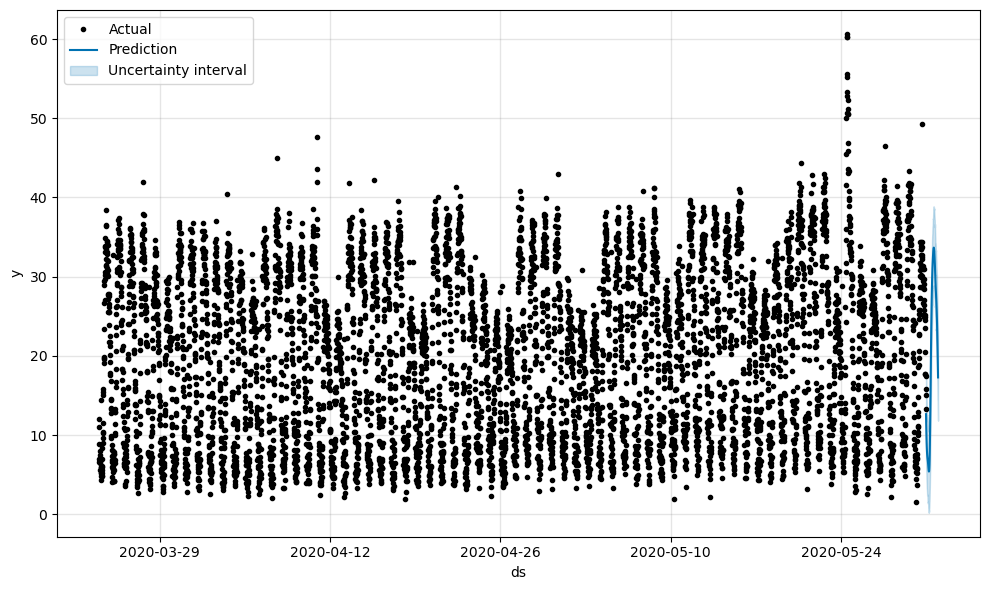

In [188]:
import datetime
fig = model.plot(forecast)

plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show(x)

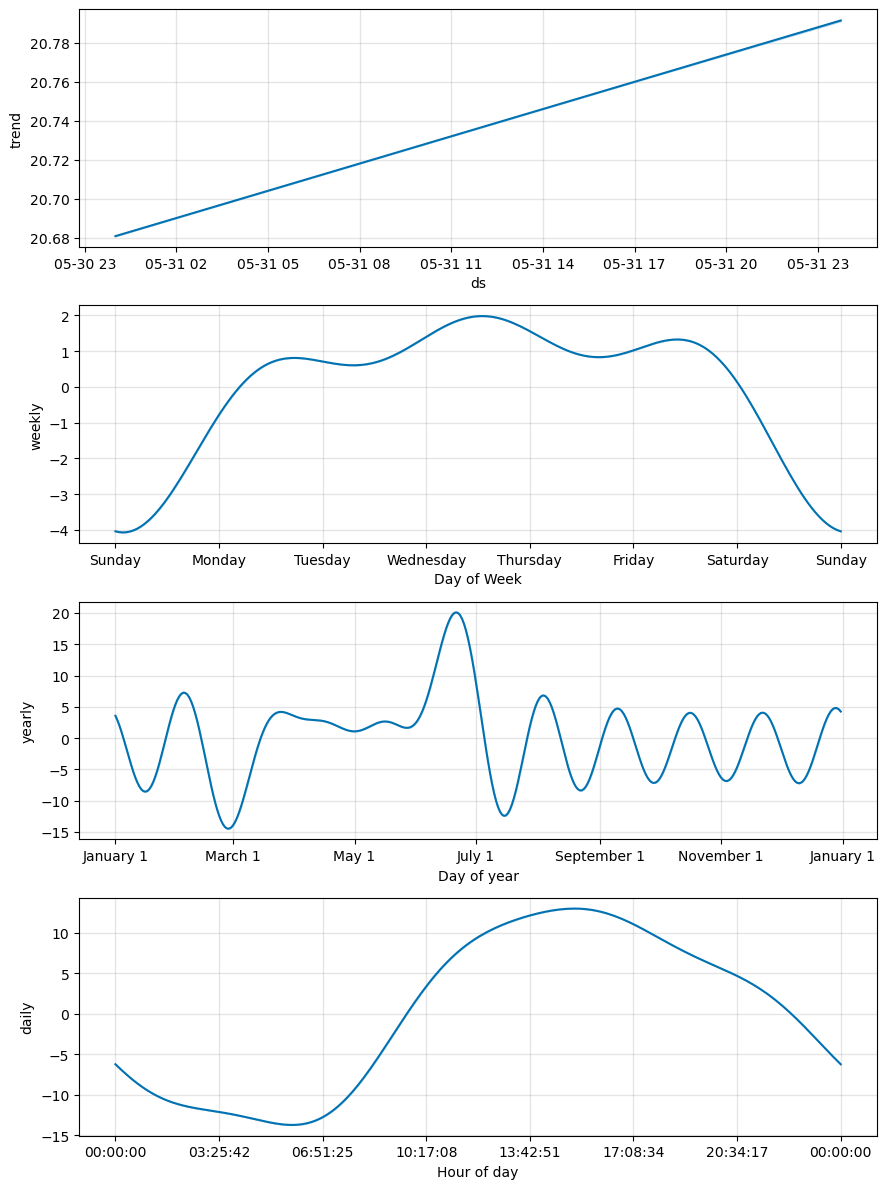

In [202]:
fig2 = model.plot_components(forecast)

In [189]:
predictions_df.yhat

index
0        3.681693
1        3.277366
2        2.887223
3        2.514482
4        2.162223
          ...    
4603    20.953887
4604    20.048203
4605    19.122462
4606    18.194104
4607    17.281366
Name: yhat, Length: 4608, dtype: float64

In [194]:
submission_df = predictions_df[['yhat']]
submission_df.index.name = 'index'
submission_df.columns = ['CPULOAD']
submission_df.to_csv('submission.csv', index=True)


In [195]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-31  12.645004    7.485971   17.516103
1 2020-05-31  12.645004    7.402967   17.723506
2 2020-05-31  12.645004    7.638253   17.804758
3 2020-05-31  12.645004    7.674116   17.962376
4 2020-05-31  12.645004    7.095312   17.624524


In [213]:

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

train['DATETIME'] = pd.to_datetime(train['DATETIME'])

train['DATETIME'] = train['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

test['DATETIME'] = pd.to_datetime(test['DATETIME'])

test['DATETIME'] = test['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

predictions_df = pd.DataFrame()

for server in data['SERVER'].unique():
    for cpu in data[data['SERVER'] == server]['CPU'].unique():

        temp_df = data[(data['SERVER'] == server) & (data['CPU'] == cpu)].copy()
        temp_df = temp_df[['DATETIME', 'CPULOAD']] 
        temp_df.columns = ['ds', 'y']  

        model = Prophet()
        model.fit(temp_df)

        future = test_data[test_data['SERVER'] == server][['DATETIME']]
        future.columns = ['ds']
        forecast = model.predict(future)

       
        forecast['SERVER'] = server  
        forecast['CPU'] = cpu
        predictions_df = pd.concat([predictions_df, forecast], ignore_index=True)

/tmp/ipykernel_32/3093148783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DATETIME'] = pd.to_datetime(train['DATETIME'])
/tmp/ipykernel_32/3093148783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DATETIME'] = train['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')
/tmp/ipykernel_32/3093148783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

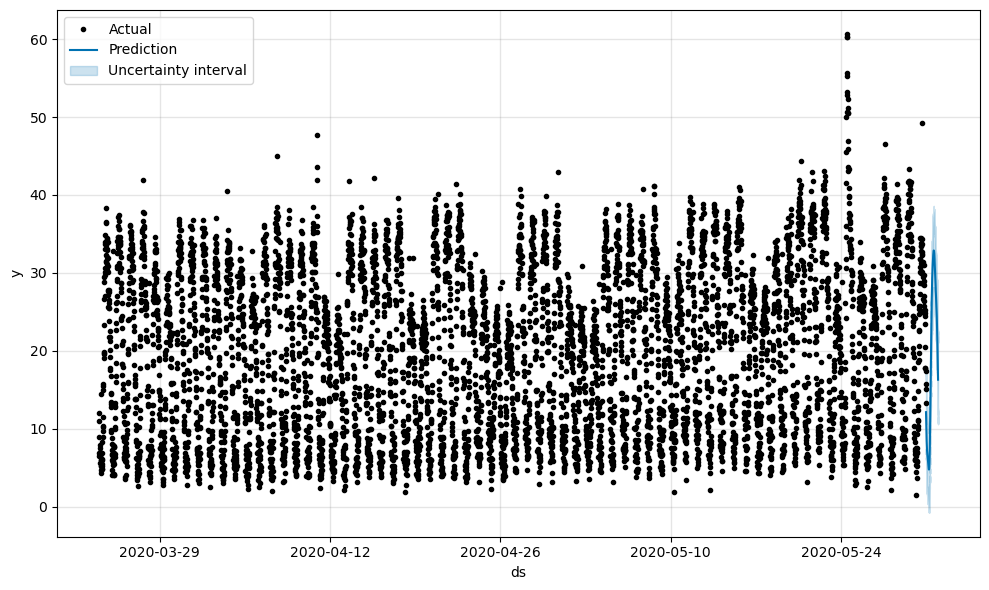

In [214]:
import datetime
fig = model.plot(forecast)

plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

In [221]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error


grouped = data.groupby('SERVER')

maes = []  

for name, group in grouped:
    print(f'Processing SERVER: {name}...')
    
    df = group.rename(columns={'DATETIME': 'ds', 'CPULOAD': 'y'})
    
    train_size = int(0.8 * len(df))  
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]
    
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
    
    model.fit(train_df)
    
    future = model.make_future_dataframe(periods=len(test_df))
    forecast = model.predict(future)
    
    forecast_test = forecast.iloc[train_size:]

    
    



Processing SERVER: CIHAZ_301...


13:33:05 - cmdstanpy - INFO - Chain [1] start processing
13:33:55 - cmdstanpy - INFO - Chain [1] done processing


Processing SERVER: CIHAZ_305...


13:34:21 - cmdstanpy - INFO - Chain [1] start processing
13:36:39 - cmdstanpy - INFO - Chain [1] done processing


In [197]:
predictions_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,SERVER,CPU
index,,,,,,,,,,,,,,,,,,,,,
0,2020-05-31,6.593652,-2.647707,9.582295,6.593652,6.593652,-2.911959,-2.911959,-2.911959,-3.40011,...,-1.344961,1.833113,1.833113,1.833113,0.0,0.0,0.0,3.681693,CIHAZ_301,CPU-0
1,2020-05-31,6.593652,-2.265999,9.522030,6.593652,6.593652,-2.911959,-2.911959,-2.911959,-3.40011,...,-1.344961,1.833113,1.833113,1.833113,0.0,0.0,0.0,3.681693,CIHAZ_301,CPU-0
2,2020-05-31,6.593652,-2.306442,9.275943,6.593652,6.593652,-2.911959,-2.911959,-2.911959,-3.40011,...,-1.344961,1.833113,1.833113,1.833113,0.0,0.0,0.0,3.681693,CIHAZ_301,CPU-0
3,2020-05-31,6.593652,-1.960743,9.853526,6.593652,6.593652,-2.911959,-2.911959,-2.911959,-3.40011,...,-1.344961,1.833113,1.833113,1.833113,0.0,0.0,0.0,3.681693,CIHAZ_301,CPU-0
4,2020-05-31,6.593652,-2.209203,9.597813,6.593652,6.593652,-2.911959,-2.911959,-2.911959,-3.40011,...,-1.344961,1.833113,1.833113,1.833113,0.0,0.0,0.0,3.681693,CIHAZ_301,CPU-0


In [ ]:
"""
forecasted['anomaly']=0
forecasted[forecasted['fact']>forecasted['yhat_upper'],'anomaly']=1
forecasted[forecasted['fact']<forecasted['yhat_lower'],'anomaly']=-1
"""

In [ ]:
#forecasted

In [ ]:
"""


forecasted['importance'] = 0
forecasted.loc[forecasted['anomaly'] ==1, 'importance'] =(forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] =(forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
"""

In [ ]:
#predictions_df.info()

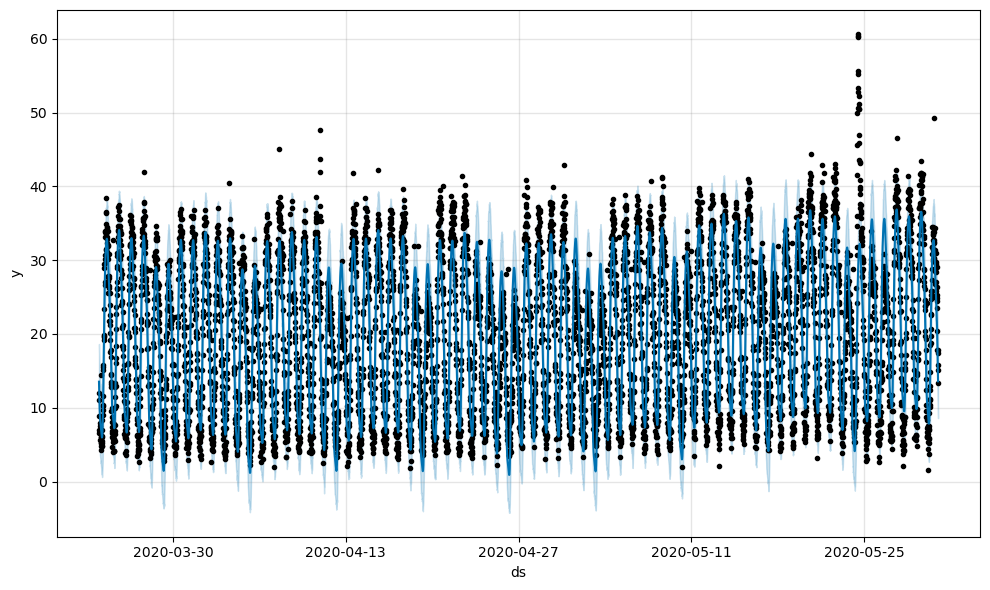

In [200]:

model.plot(forecast_df)  
forecast_df = forecast_df.rename(columns={'yhat': 'yhat_'+ server})
target = pd.merge(predictions_df, forecast_df.set_index('ds'), how='outer', left_index=True, right_index=True)


In [225]:
import numpy as np

mean_cpuload = data['CPULOAD'].mean()
std_cpuload = data['CPULOAD'].std()

threshold = 3

data['anomaly'] = ((np.abs(data['CPULOAD'] - mean_cpuload)) > threshold * std_cpuload).astype(int)


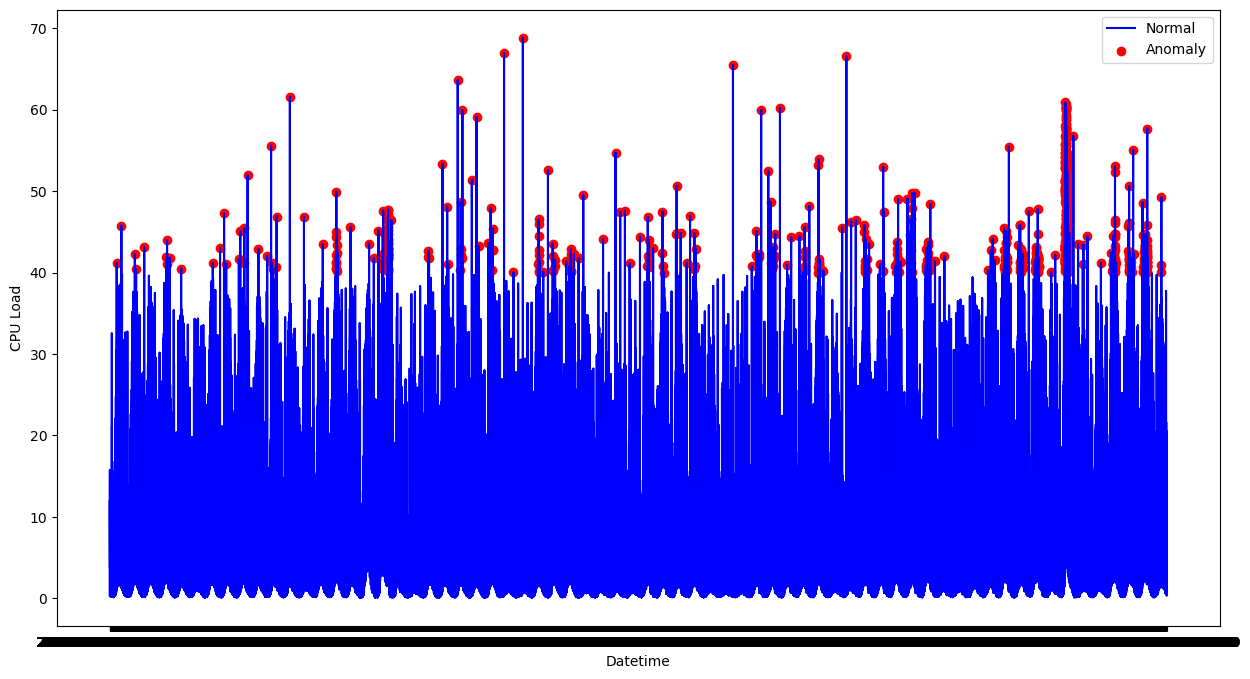

In [226]:
import matplotlib.pyplot as plt

anomalies = data[data['anomaly'] == 1]

plt.figure(figsize=(15,8))
plt.plot(data['DATETIME'], data['CPULOAD'], color='blue', label = 'Normal')
plt.scatter(anomalies['DATETIME'], anomalies['CPULOAD'], color='red', label = 'Anomaly')
plt.xlabel('Datetime')
plt.ylabel('CPU Load')
plt.legend()
plt.show()


In [ ]:
#fig2 = model.plot_components(forecast)

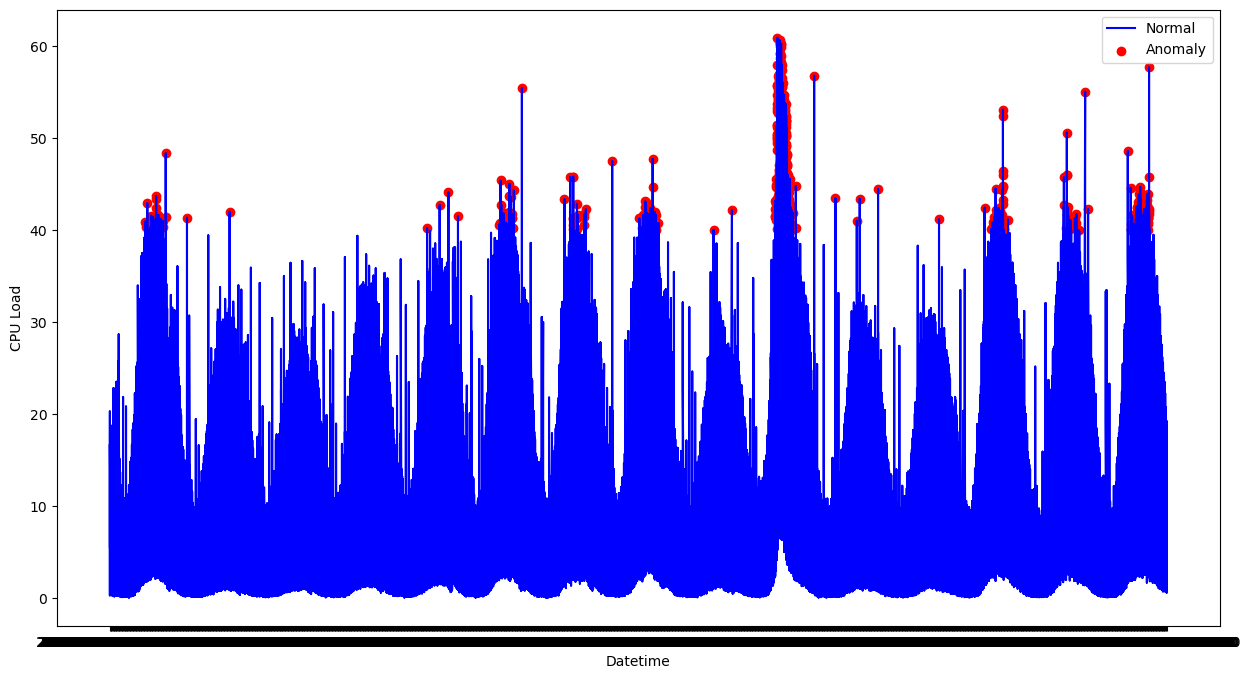

In [229]:
start_date = '2020-05-15'
end_date = '2020-05-30'
mask = (data['DATETIME'] > start_date) & (data['DATETIME'] <= end_date)
filtered_data = data.loc[mask]

anomalies = filtered_data[filtered_data['anomaly'] == 1]

plt.figure(figsize=(15,8))
plt.plot(filtered_data['DATETIME'], filtered_data['CPULOAD'], color='blue', label = 'Normal')
plt.scatter(anomalies['DATETIME'], anomalies['CPULOAD'], color='red', label = 'Anomaly')
plt.xlabel('Datetime')
plt.ylabel('CPU Load')
plt.legend()
plt.show()

In [216]:
"""
start_date = '2020-05-15 00:00:00'
end_date = '2020-05-30 23:59:00'
filtered_data = data[(data['DATETIME'] >= start_date) & (data['DATETIME'] <= end_date)]

"""

In [ ]:
"""
start_date = '2020-05-15 00:00:00'
end_date = '2020-05-30 23:59:00'
filtered_data = data[(data['DATETIME'] >= start_date) & (data['DATETIME'] <= end_date)]

"""

In [222]:
"""
threshold = average_loads['CPULOAD'].mean() + 3*average_loads['CPULOAD'].std()
anomalies = average_loads[average_loads['CPULOAD'] > threshold]
anomalies = anomalies.merge(filtered_data[['SERVER', 'CPU', 'DATETIME']], on=['SERVER', 'CPU'], how='left')

"""

In [223]:
"""
anomalies
"""

,CPULOAD,SERVER,CPU,DATETIME


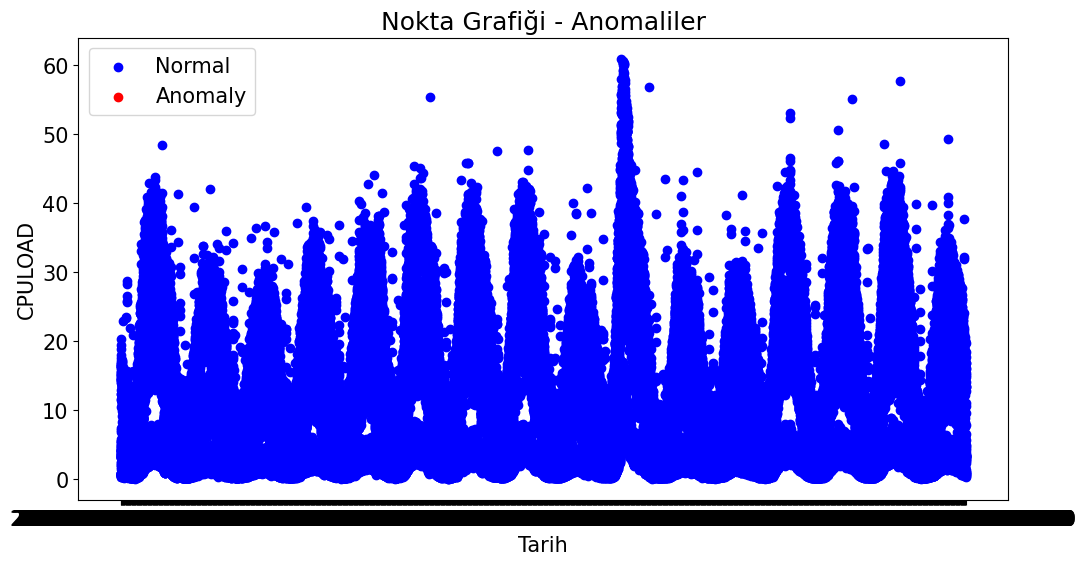

In [224]:
"""
import matplotlib.pyplot as plt

plt.scatter(filtered_data['DATETIME'], filtered_data['CPULOAD'], color='blue', label='Normal')
plt.scatter(anomalies['DATETIME'], anomalies['CPULOAD'], color='red', label='Anomaly')
plt.xlabel('Tarih')
plt.ylabel('CPULOAD')
plt.title('Nokta Grafiği - Anomaliler')
plt.legend()
plt.show()

"""

In [270]:

data['residuals'] = temp_df['y'] - forecast_df['yhat']

# 1.45
threshold = data['residuals'].std() * 1.5
anomalies = data[data['residuals'].abs() > threshold]


,DATETIME,SERVER,CPU,CPULOAD,residuals
719,2020-03-24 03:30:00,CIHAZ_305,CPU-9,5.67,-25.584491
815,2020-03-24 04:00:00,CIHAZ_305,CPU-9,6.03,-26.470866
911,2020-03-24 04:30:00,CIHAZ_305,CPU-9,5.26,-26.131398
1007,2020-03-24 05:00:00,CIHAZ_305,CPU-9,5.20,-26.634662
1295,2020-03-24 06:30:00,CIHAZ_305,CPU-9,6.16,-25.104263
2399,2020-03-24 12:15:00,CIHAZ_305,CPU-9,33.78,25.705607
2495,2020-03-24 12:45:00,CIHAZ_305,CPU-9,34.84,30.666636
2591,2020-03-24 13:15:00,CIHAZ_305,CPU-9,33.55,25.855623
2687,2020-03-24 13:45:00,CIHAZ_305,CPU-9,36.58,27.789496
2975,2020-03-24 15:15:00,CIHAZ_305,CPU-9,33.13,24.158719


In [215]:
import numpy as np

# 'CPULOAD' kolonunun ortalama ve standart sapmasını hesapla
mean_cpuload = data['CPULOAD'].mean()
std_cpuload = data['CPULOAD'].std()

# Anomali eşiği belirle (örneğin, ortalamanın 3 standart sapma uzağında olanlar)
threshold = 3

# Anomali olup olmadığını belirle
data['anomaly'] = ((np.abs(data['CPULOAD'] - mean_cpuload)) > threshold * std_cpuload).astype(int)


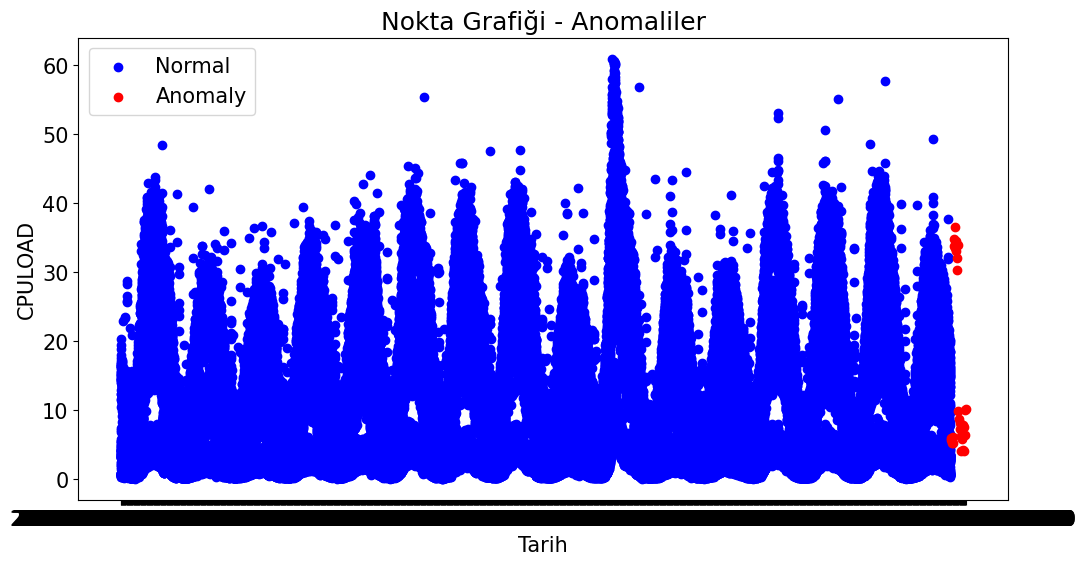

In [271]:

import matplotlib.pyplot as plt

plt.scatter(filtered_data['DATETIME'], filtered_data['CPULOAD'], color='blue', label='Normal')
plt.scatter(anomalies['DATETIME'], anomalies['CPULOAD'], color='red', label='Anomaly')
plt.xlabel('Tarih')
plt.ylabel('CPULOAD')
plt.title('Nokta Grafiği - Anomaliler')
plt.legend()
plt.show()

